# Part 1.3 | Data Structures Exercises

In [ ]:
# Run if you're using Google Colab

# Replace with your file path
file_path = 'drive/MyDrive/TEACHING/ECON_0150/'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys


In [29]:
# Run if you're using Anaconda locally on your computer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys


In [1]:
# Run if using Weidman_Figures locally

from Weidman_Figures import *

file_path = ''

## Time-Series Data 

### Summary and Visualization

This notebook summarizes and visualizes the time-series dataset.

### Load the time-series dataset

In [2]:
# Load the time-series dataset
time_series_data_path = "time_series_numerical_dataset.csv"  # Update this path if necessary
time_series = pd.read_csv(time_series_data_path)

# Ensure the time column is in datetime format
time_series['Month-Year'] = pd.to_datetime(time_series['Month-Year'], format="%b-%Y")

### Summarize the dataset

In [3]:
# Summarize the dataset
time_series_summary = time_series['GDP (Million USD)'].describe()
print(time_series_summary)

count     120.000000
mean     1930.848500
std       581.685051
min      1001.720000
25%      1448.720000
50%      1841.240000
75%      2423.367500
max      2999.520000
Name: GDP (Million USD), dtype: float64


### Visualize the dataset - Histogram

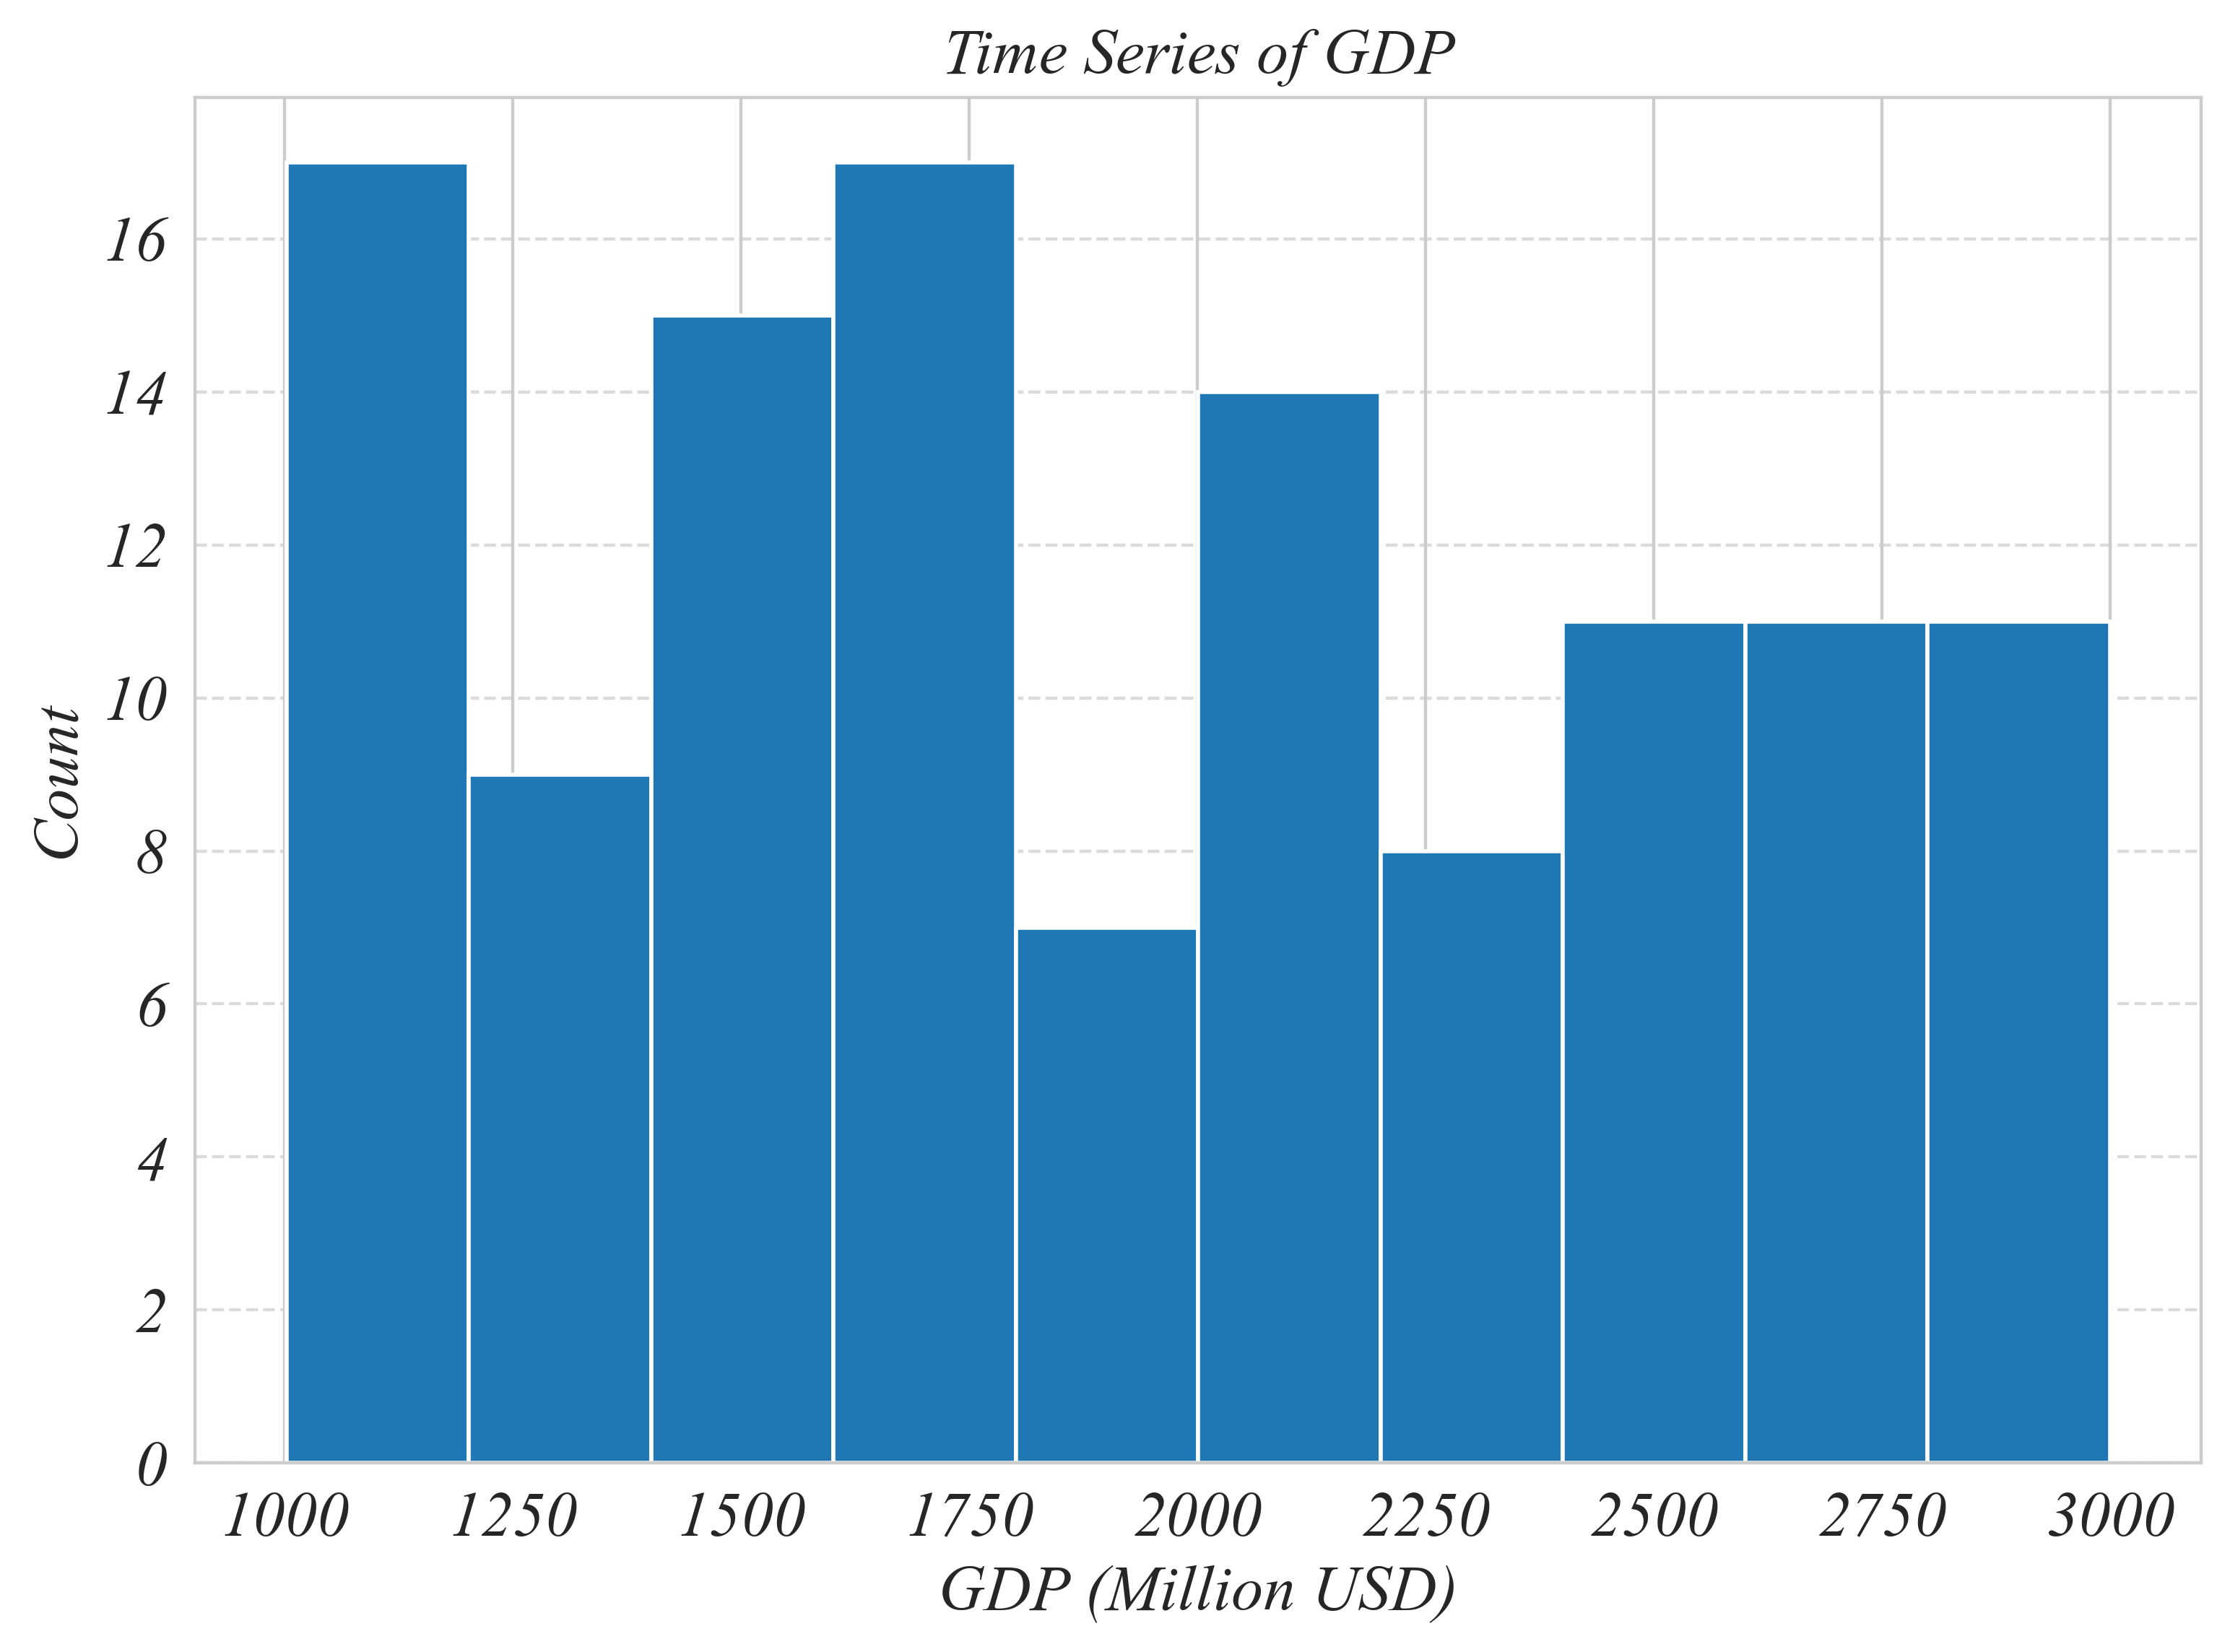

In [4]:
plt.figure(figsize=(8, 6))

plt.hist(time_series['GDP (Million USD)'], bins=10, edgecolor='white')

plt.title("Time Series of GDP")
plt.xlabel("GDP (Million USD)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Time_Series_Histogram')

### Visualize the dataset - Boxplot with jittered horizontal scatter 

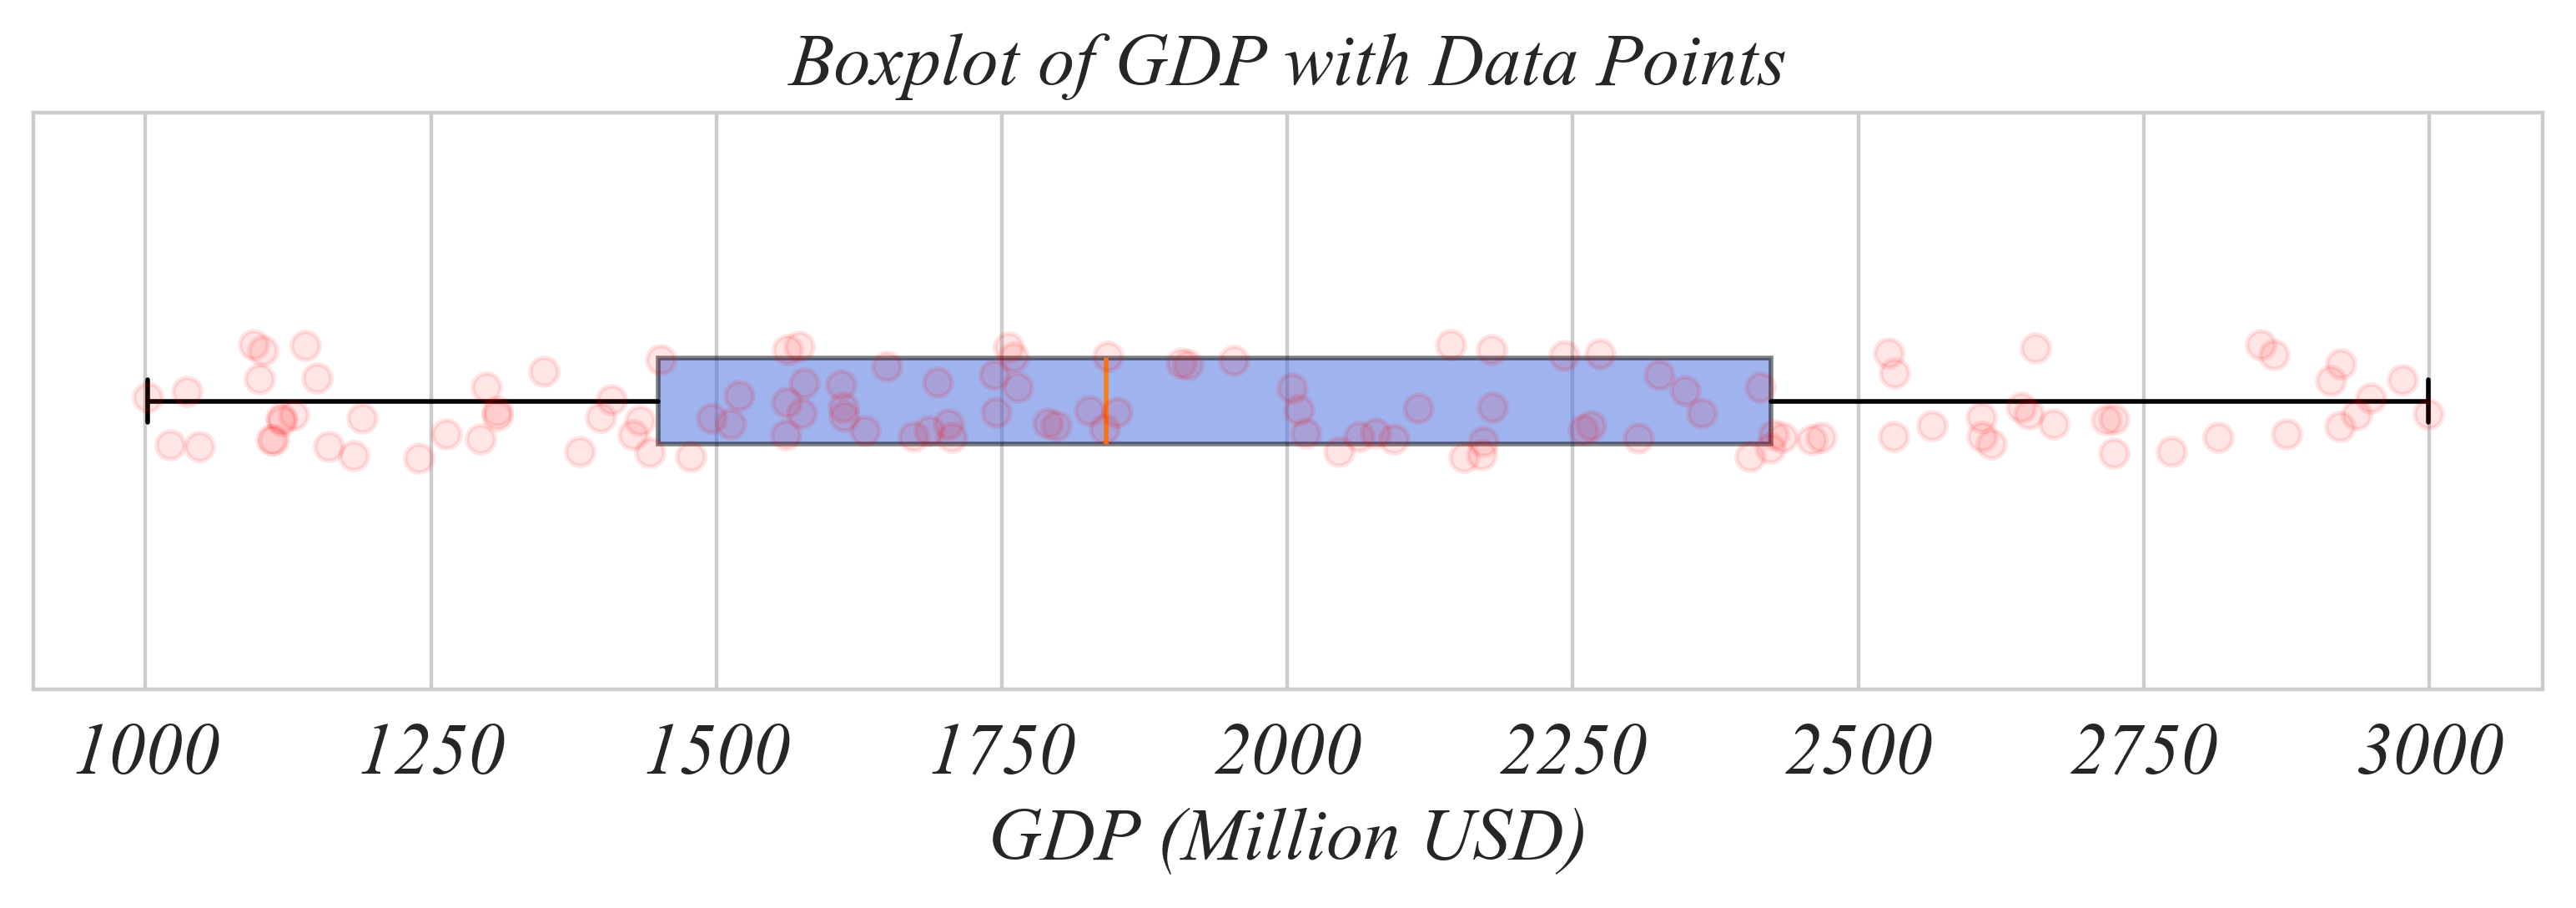

In [5]:
plt.figure(figsize=(8, 3))
plt.boxplot(time_series['GDP (Million USD)'], vert=False, patch_artist=True, boxprops=dict(facecolor='royalblue', alpha=0.5), zorder=2)

import numpy as np
jitter = np.random.uniform(0.9,1.1, len(time_series))

plt.scatter(time_series['GDP (Million USD)'], jitter, alpha=0.1, color='red', label='Data Points', zorder=3)
plt.title("Boxplot of GDP with Data Points")
plt.xlabel("GDP (Million USD)")
plt.ylabel('')
plt.yticks([])
#plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Time_Series_Box_Scatter')

### Visualize the dataset - Line plot

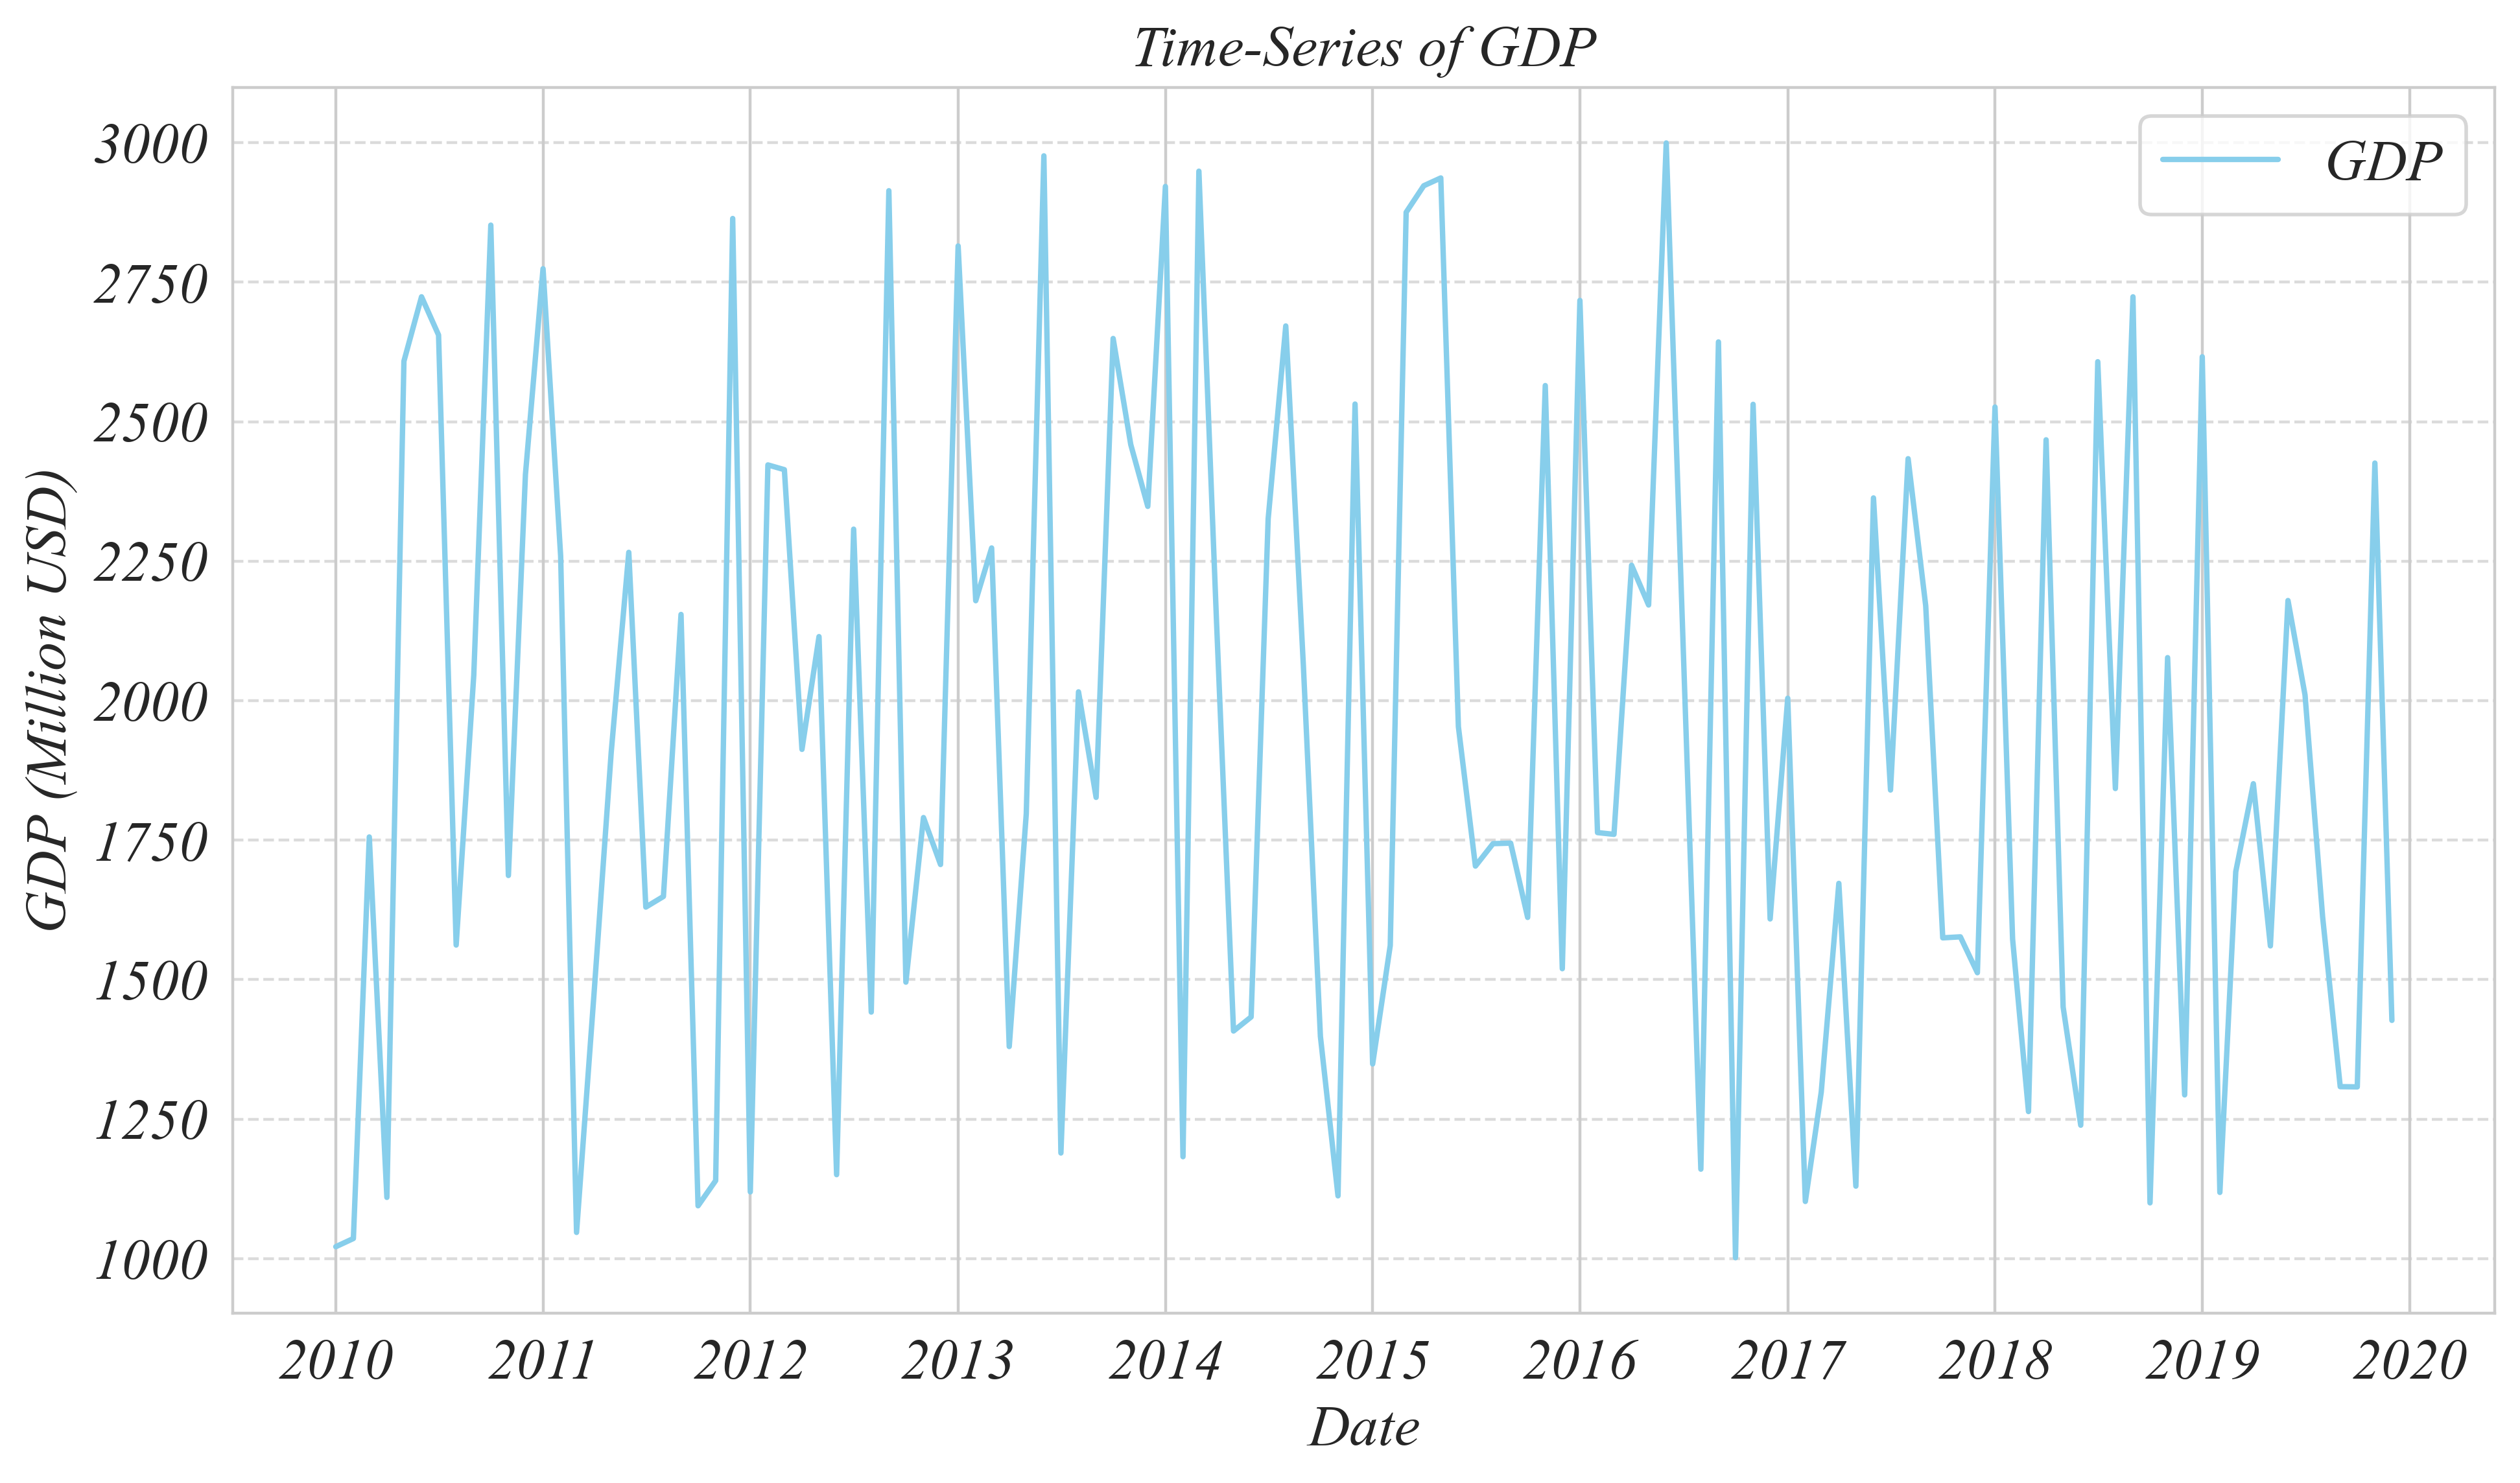

In [6]:
# Visualize the dataset - Line plot
plt.figure(figsize=(10, 6))
plt.plot(time_series['Month-Year'], time_series['GDP (Million USD)'], marker=None, color='skyblue', label='GDP')
plt.title("Time-Series of GDP")
plt.xlabel("Date")
plt.ylabel("GDP (Million USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Time_Series_Line')

### Visualize the dataset - Moving Average

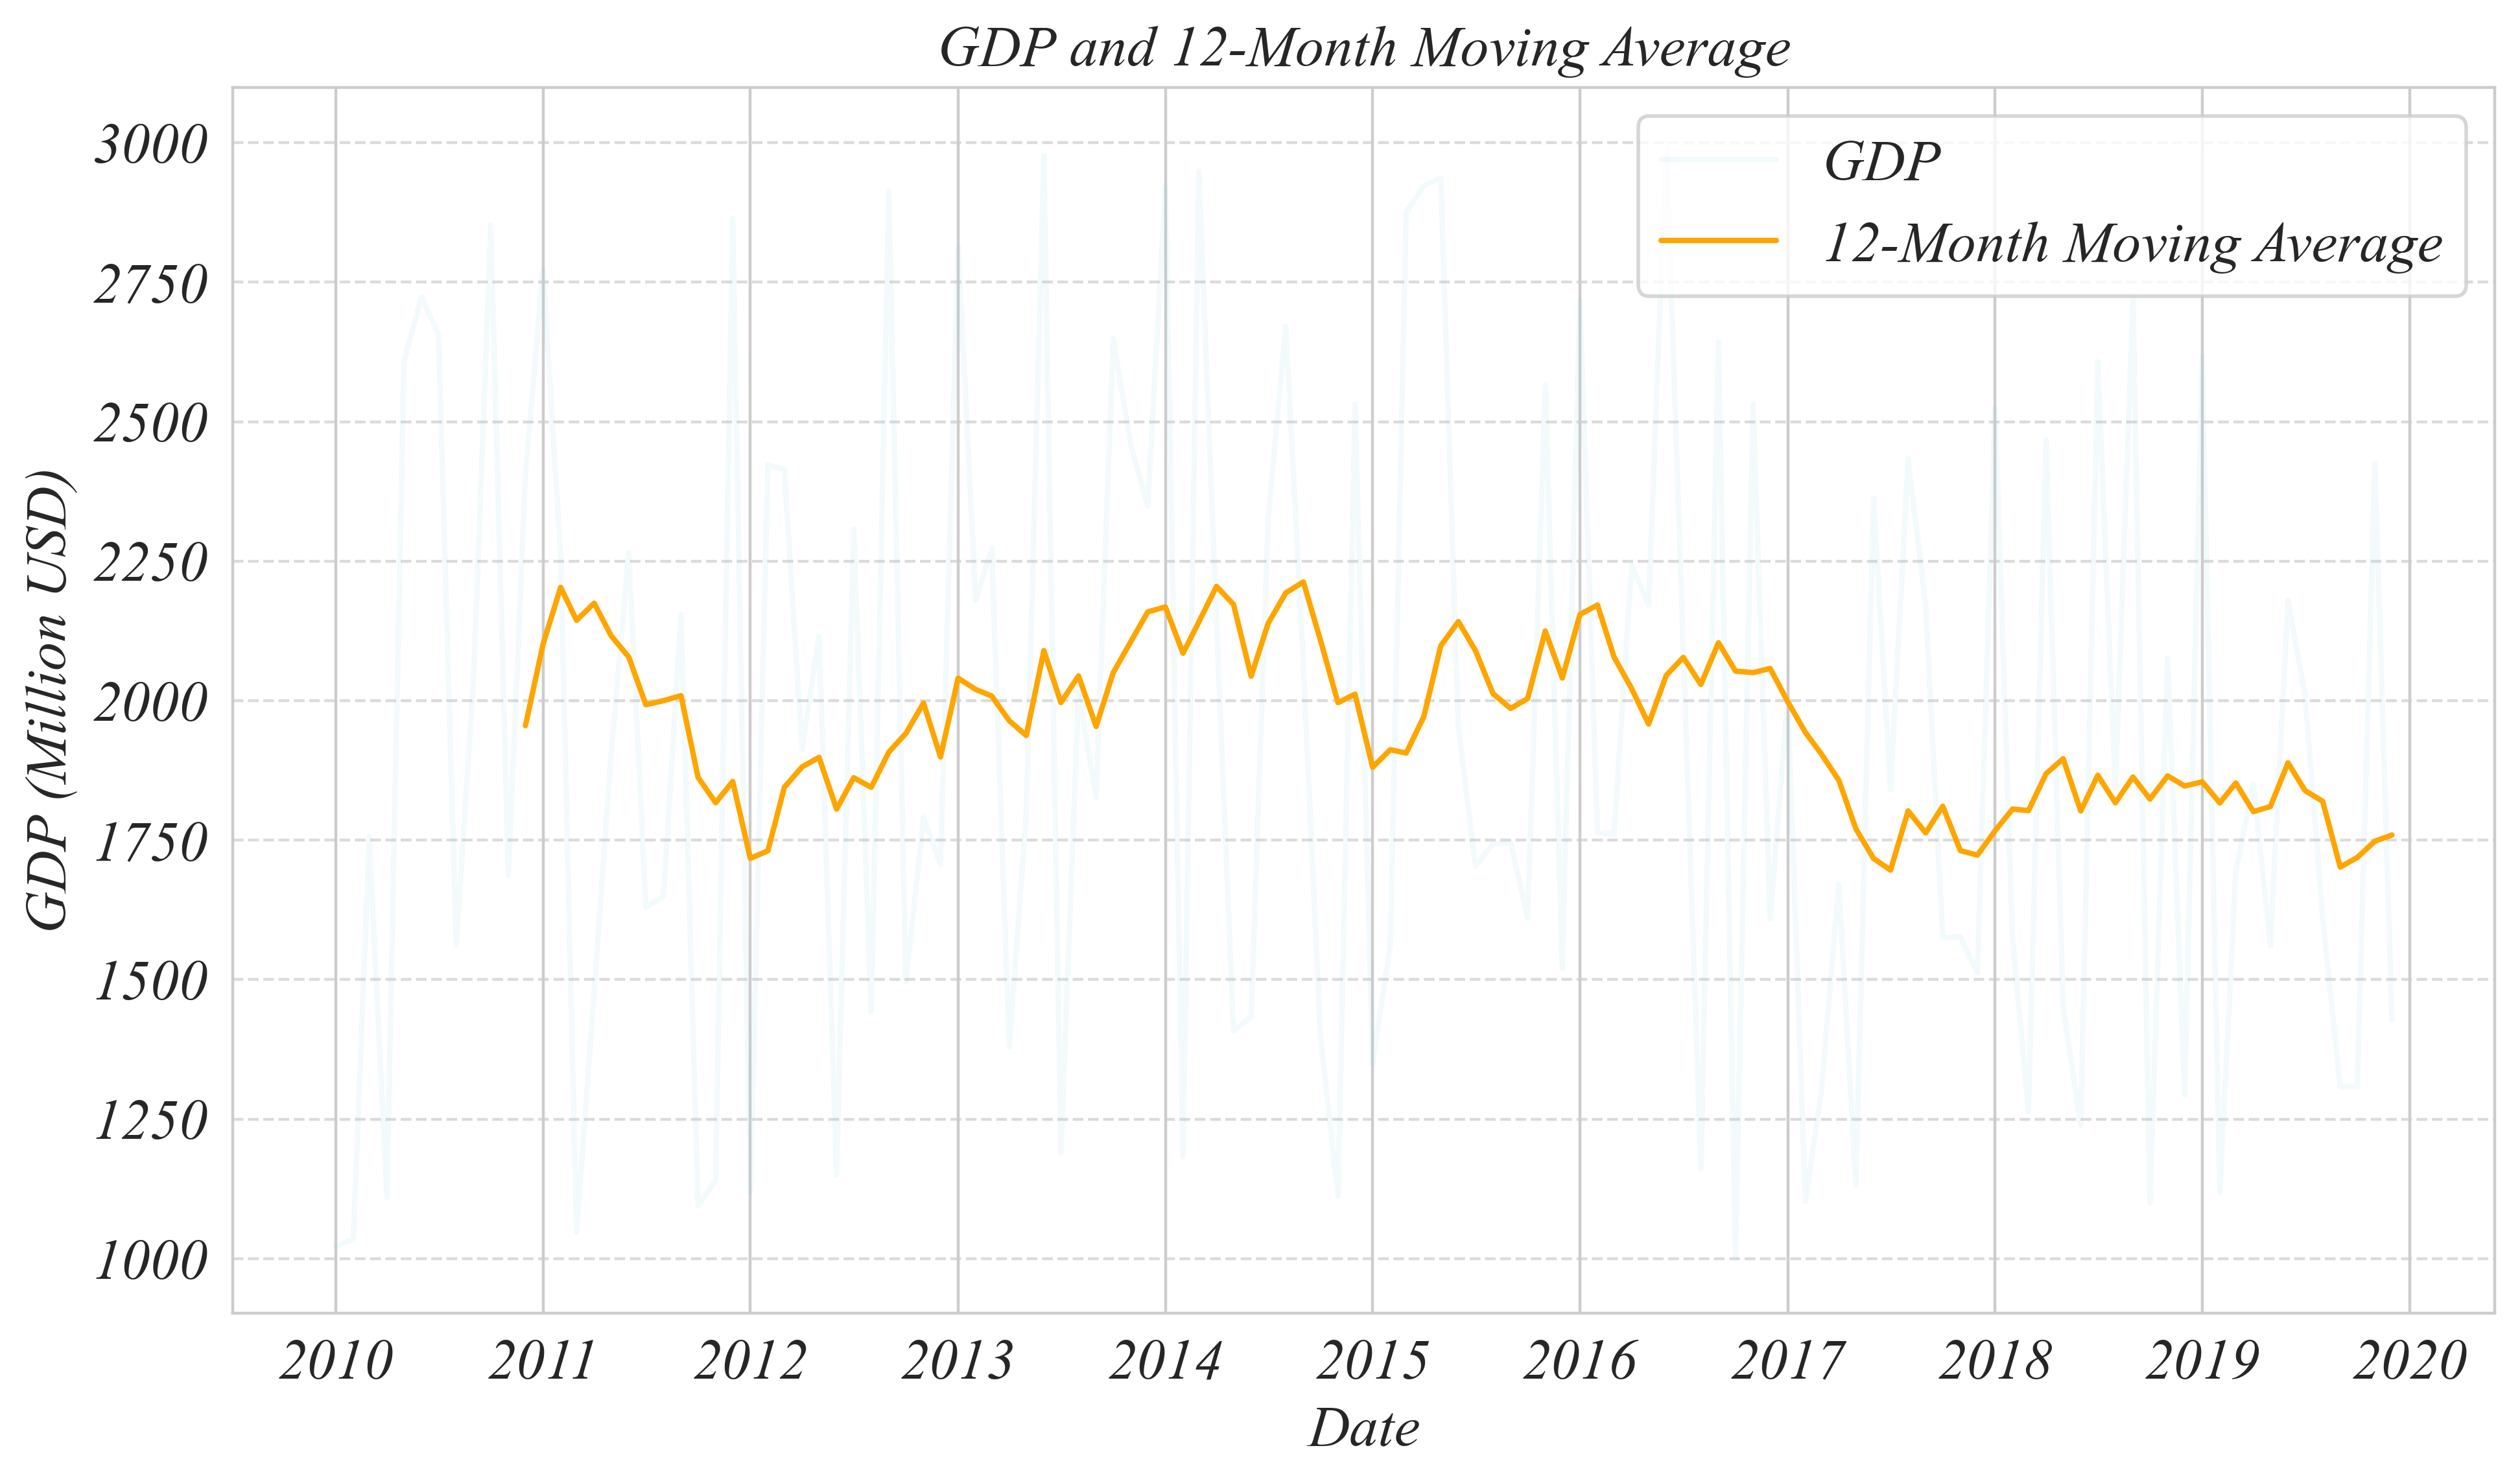

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(time_series['Month-Year'], time_series['GDP (Million USD)'], marker=None, color='skyblue', label='GDP', alpha=0.1)

time_series['GDP_MA'] = time_series['GDP (Million USD)'].rolling(window=12).mean()
plt.plot(time_series['Month-Year'], time_series['GDP_MA'], color='orange', label='12-Month Moving Average')

plt.title("GDP and 12-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("GDP (Million USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Time_Series_Line_Smooth')

## Panel Data 

### Summary and Visualization

This notebook summarizes and visualizes the panel dataset.

### Load the panel dataset

In [11]:
# Load the panel dataset
panel_data_path = "panel_numerical_dataset.csv"  # Update this path if necessary
panel = pd.read_csv(panel_data_path)

### Summarize the dataset

In [12]:
panel_summary = panel.groupby('Household ID')['Income (USD)'].describe()
print(panel_summary)

              count       mean           std       min         25%  \
Household ID                                                         
H001           10.0  74826.380  28215.226094  34610.47  50831.9550   
H002           10.0  77599.335  27274.545727  31368.41  60751.5625   
H003           10.0  73734.256  21520.553241  34423.13  68848.9925   
H004           10.0  71859.377  31515.208639  30472.06  39882.4200   
H005           10.0  70830.311  29297.171659  30734.10  47485.0275   
H006           10.0  63894.778  22537.757011  32991.41  45150.0925   
H007           10.0  67676.672  27262.786277  36330.62  49321.4325   
H008           10.0  85883.409  27807.227565  31658.30  72336.7050   
H009           10.0  87670.555  35246.311275  32791.31  55000.0750   
H010           10.0  83370.216  24253.170992  48657.89  68525.6375   
H011           10.0  92483.381  14768.569155  61041.22  86561.0500   
H012           10.0  71898.142  28155.743583  34545.42  47884.2050   
H013           10.0 

### Visualize the dataset - Line plot for each Household (not so useful)

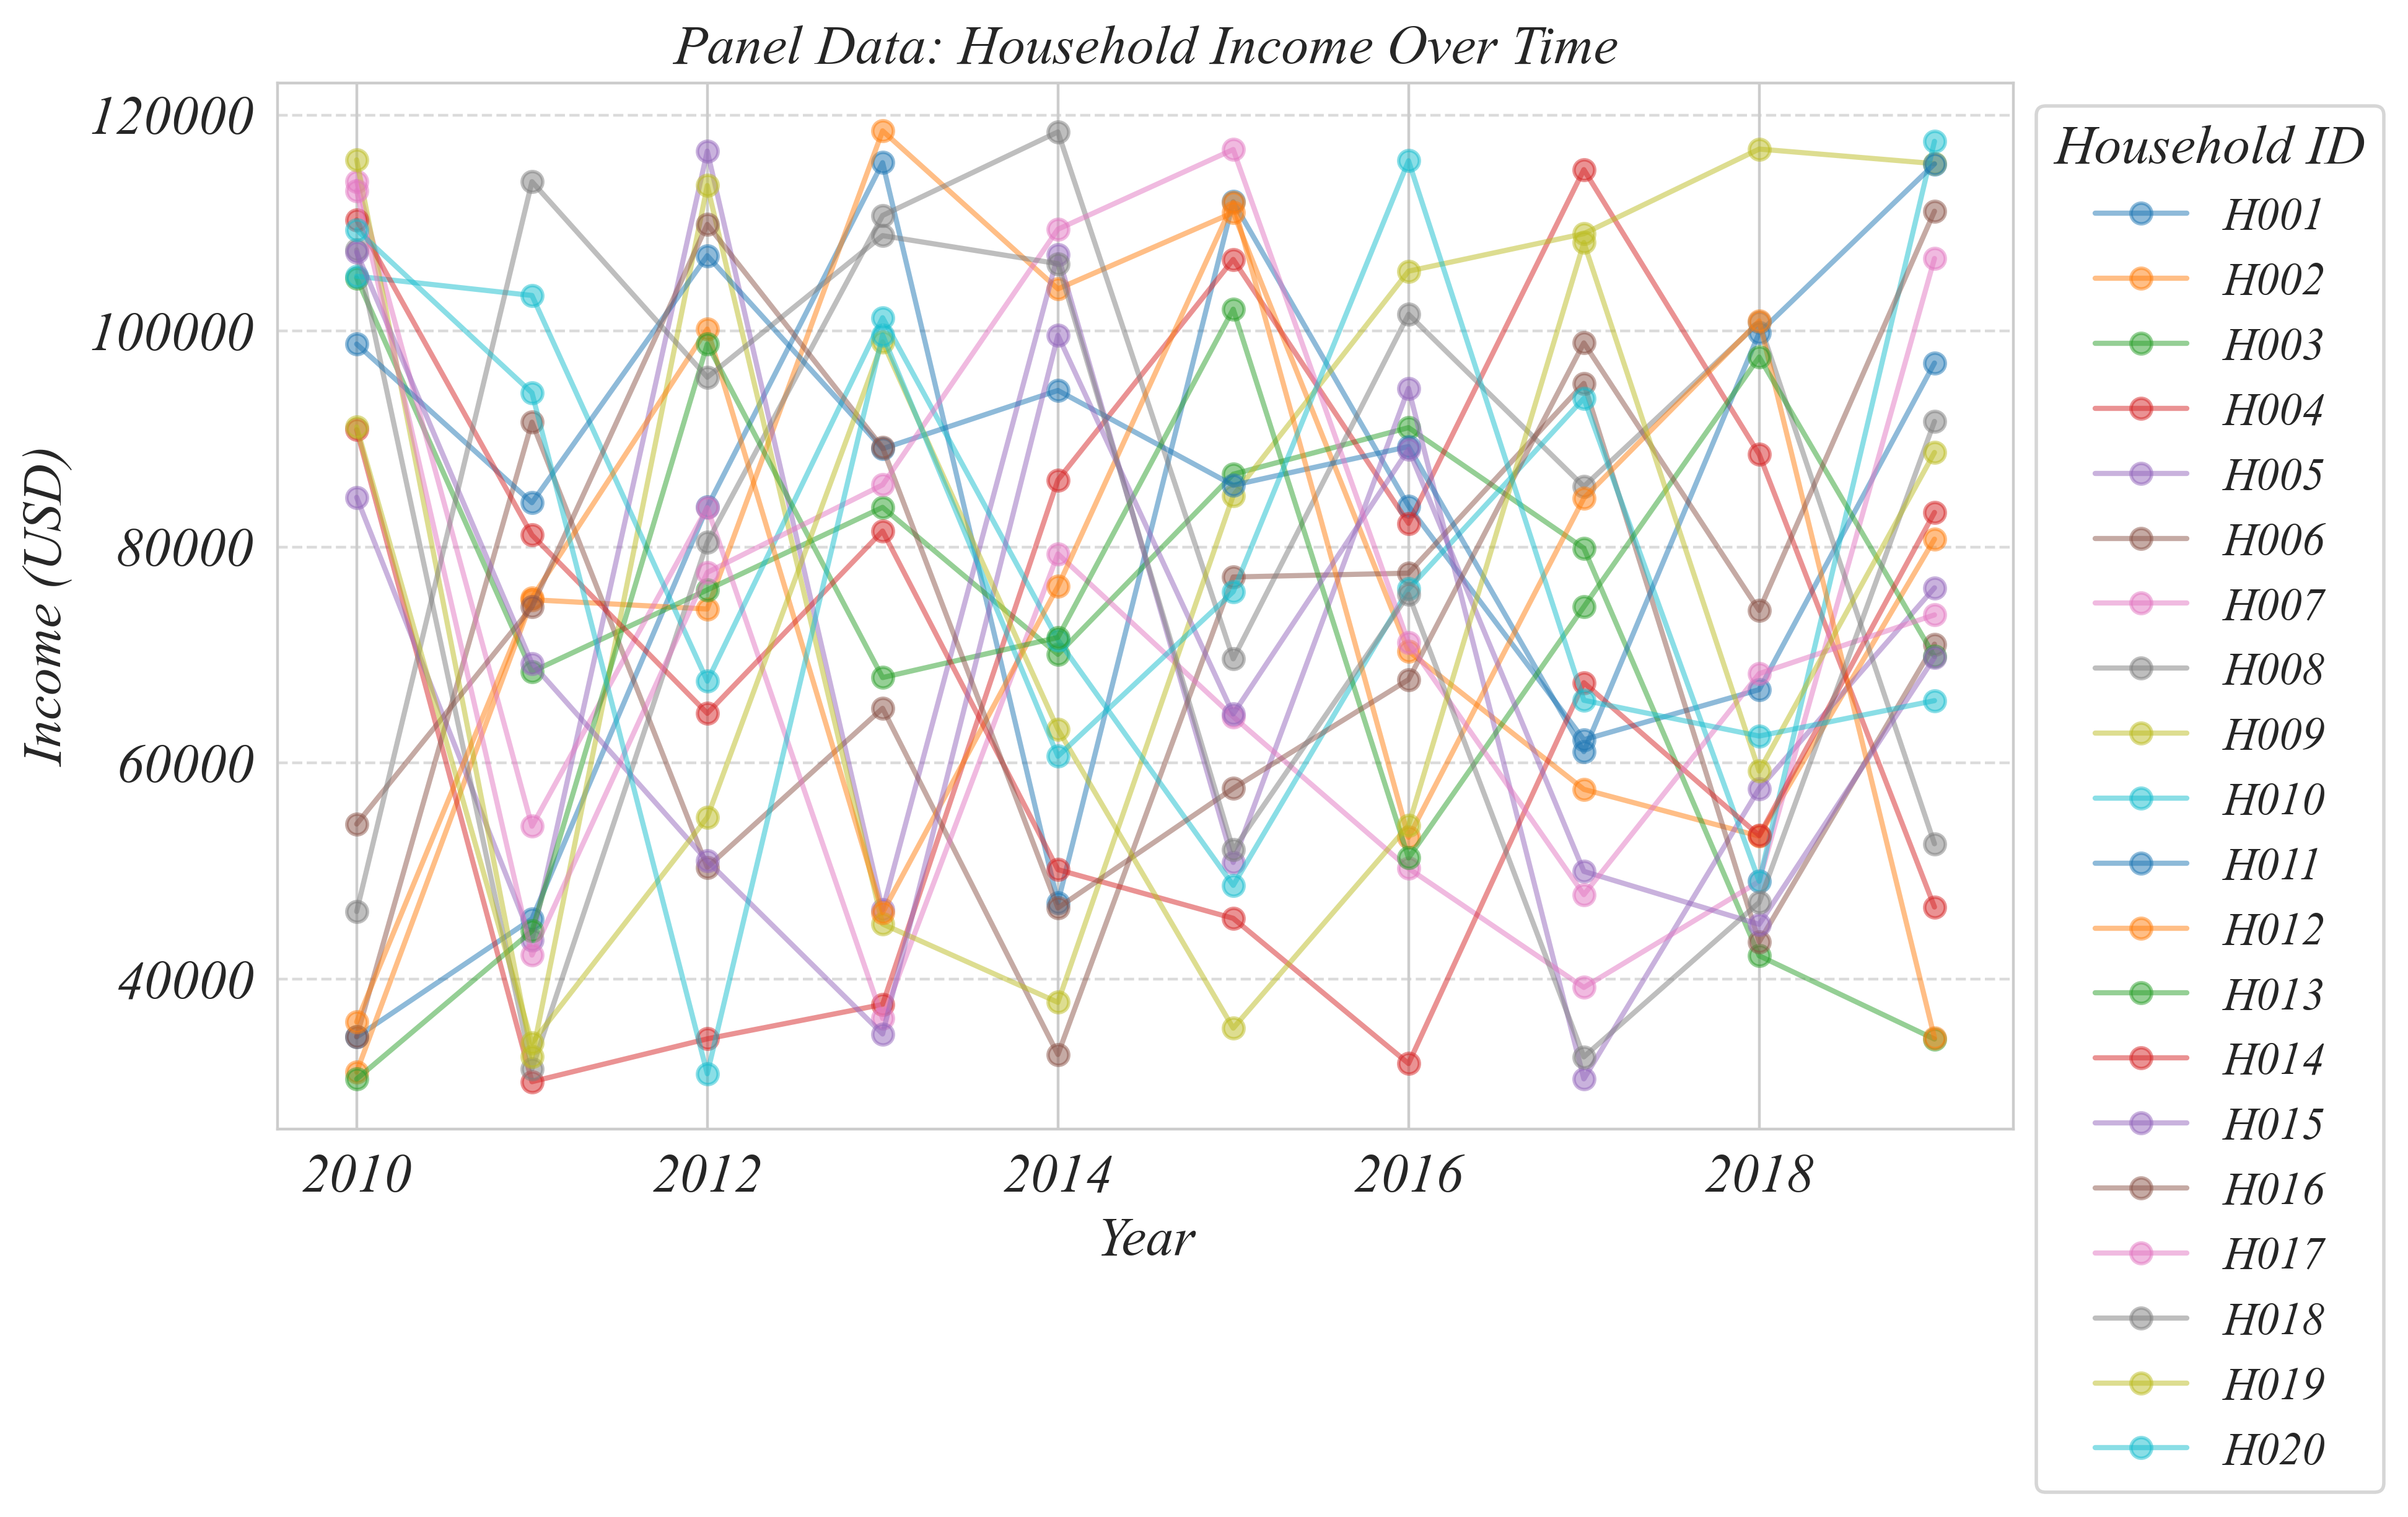

In [13]:
plt.figure(figsize=(10, 6))
for household in panel['Household ID'].unique():
    household_data = panel[panel['Household ID'] == household]
    plt.plot(household_data['Year'], household_data['Income (USD)'], marker='o', label=household, alpha=0.5)
plt.title("Panel Data: Household Income Over Time")
plt.xlabel("Year")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Household ID", fontsize='small')
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Panel_Line')

### Visualize the dataset - Boxplot by Year (maybe helpful)

/var/folders/v7/n92bbkrn50x_rhkvsgm29llc0000gn/T/ipykernel_86413/3964394567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=panel, x='Year', y='Income (USD)', palette='pastel')


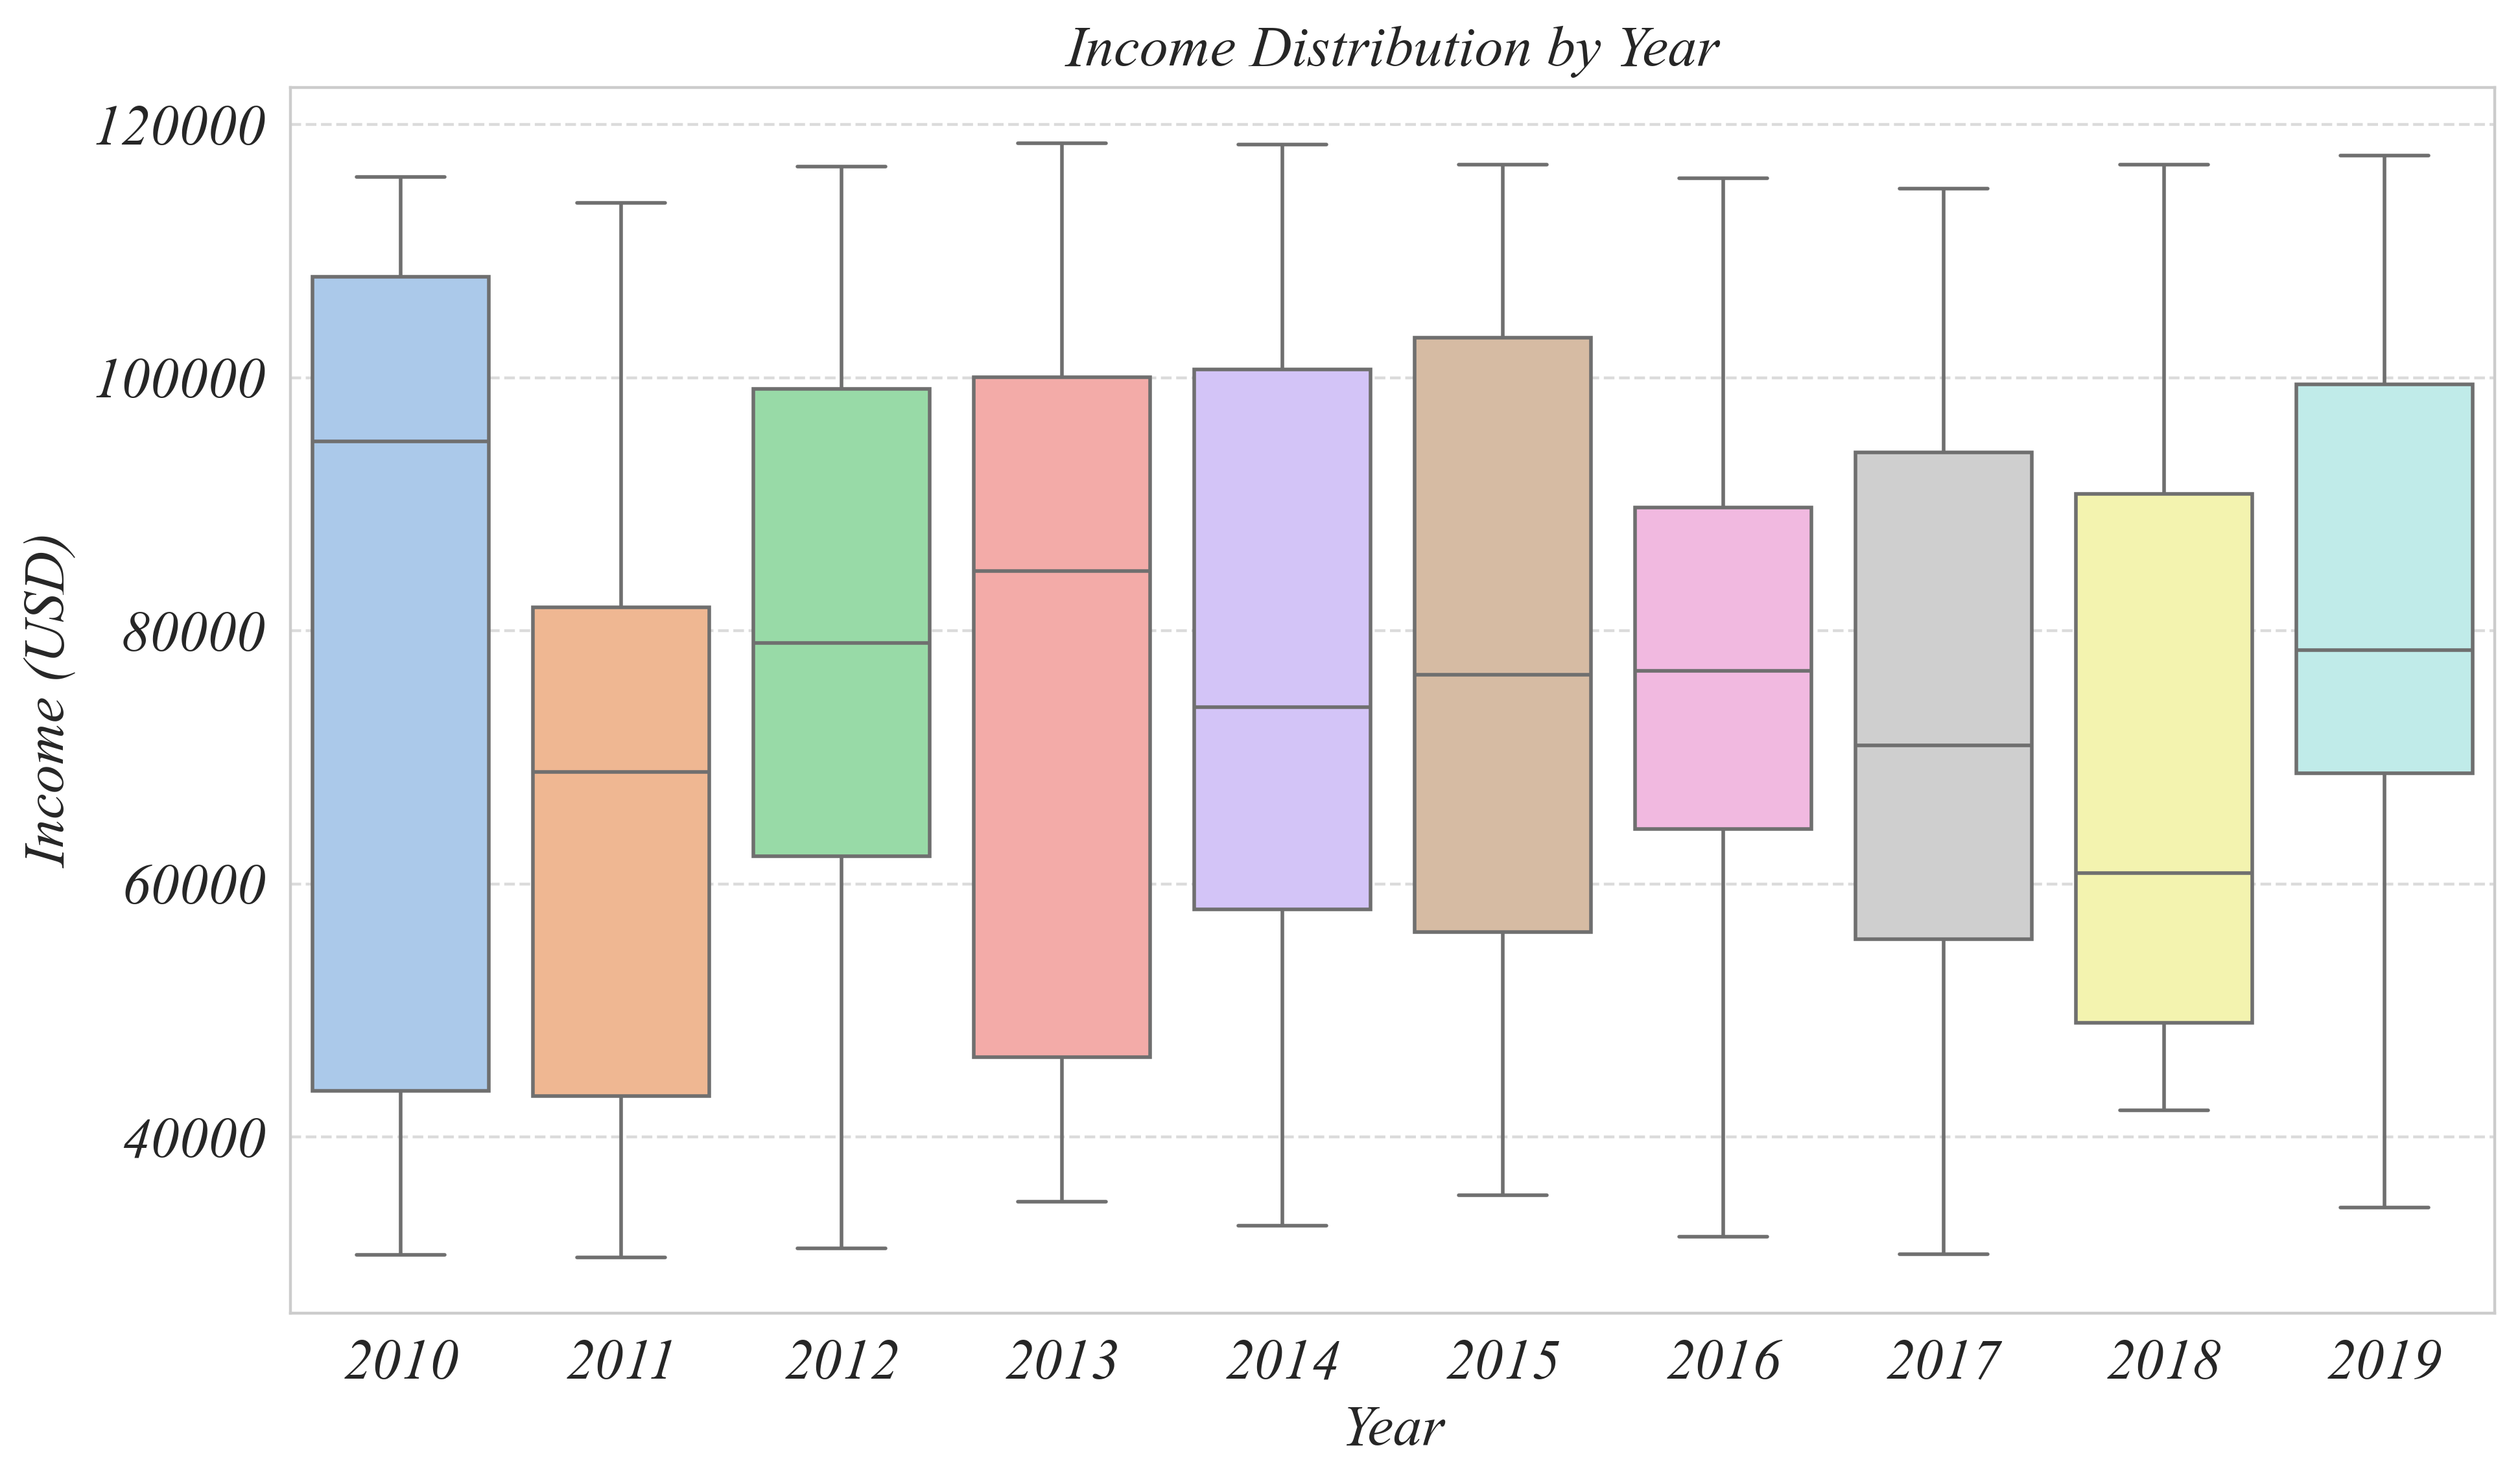

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=panel, x='Year', y='Income (USD)', palette='pastel')
plt.title("Income Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Panel_Boxplot_Year')

### Visualize the dataset - Boxplot by Household (helpful)

/var/folders/v7/n92bbkrn50x_rhkvsgm29llc0000gn/T/ipykernel_86413/748561286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=panel, y='Household ID', x='Income (USD)', palette='pastel')


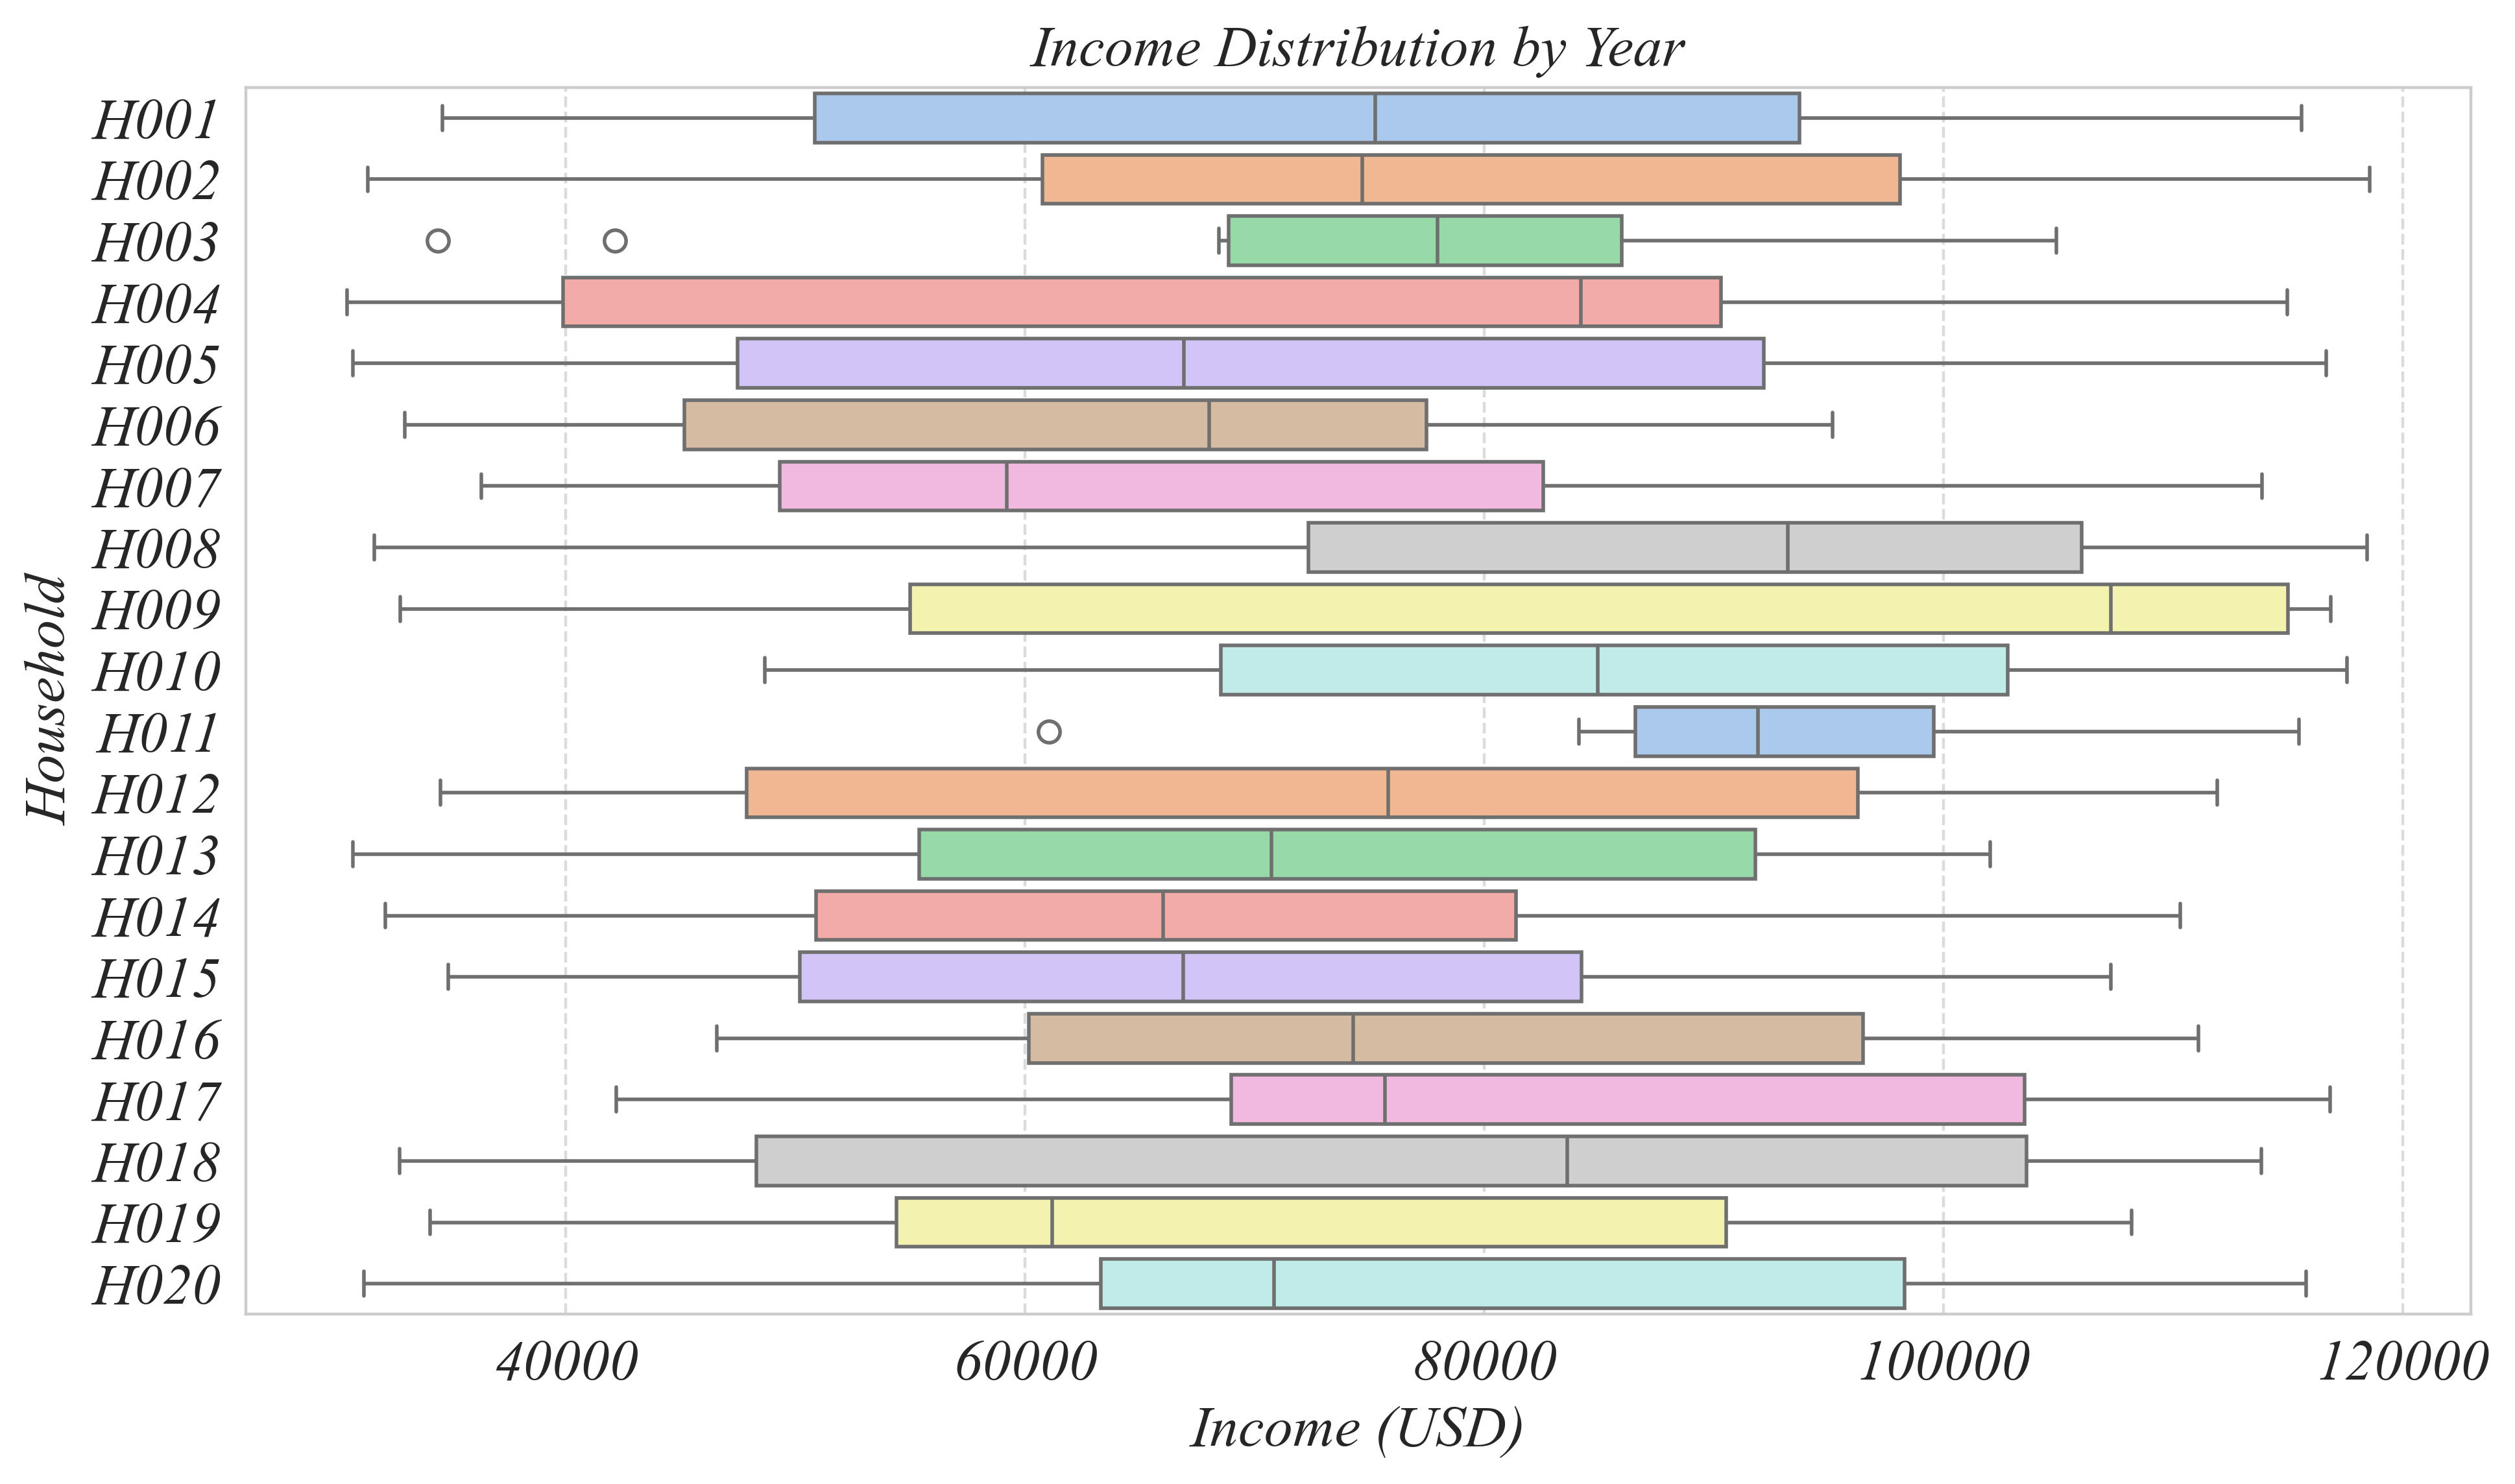

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=panel, y='Household ID', x='Income (USD)', palette='pastel')
plt.title("Income Distribution by Year")
plt.ylabel("Household")
plt.xlabel("Income (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Figures/Part_1_3_Panel_Boxplot_Household')